In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

np.set_printoptions(precision=4, linewidth=200, sign=" ")
plt.rcParams["figure.figsize"] = [15,10]

In [127]:
path = r"C:\Users\chris\Documents\Work\Polymetrix\Rust\CruxTest\pose_graph\examples\output\H.json"

with open(path, "r") as inp:
    data = json.load(inp)
    data = np.array(data[0], dtype=float).reshape((data[1], data[2]))

data.shape

(594, 594)

((-0.00017159246787394183+0j), (2.8407530800222163e-05+0j))

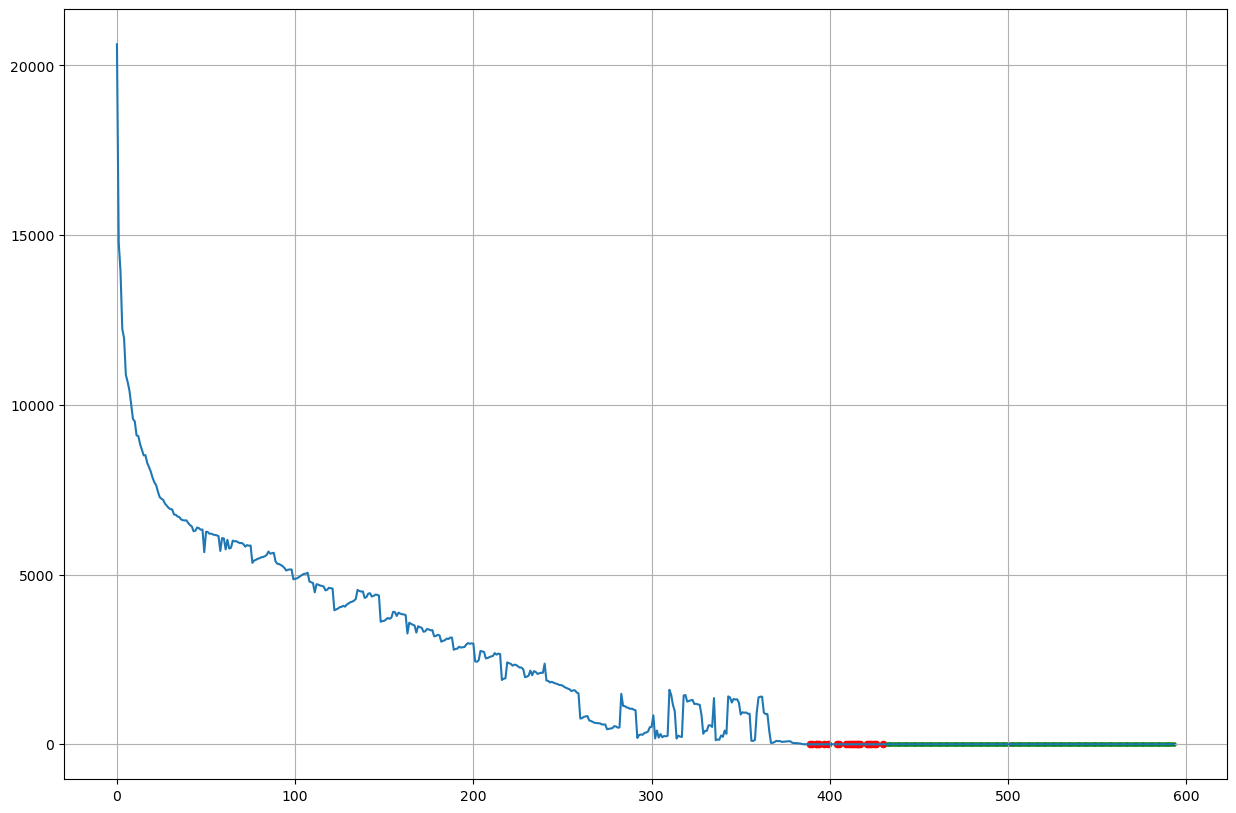

In [137]:
plt.plot(np.linalg.eigvals(data))
plt.scatter(np.array([i for i, x in enumerate(np.linalg.eigvals(data)) if x < 0]), np.linalg.eigvals(data)[np.linalg.eigvals(data) < 0], c="r", s=20)
plt.scatter(np.array([i for i, x in enumerate(np.linalg.eigvals(data)) if x == 0]), np.linalg.eigvals(data)[np.linalg.eigvals(data) == 0], c="g", s=5)
# plt.ylim((-0.0005,0.0005))
plt.grid(True, "both")
np.min(np.linalg.eigvals(data)), np.min(np.linalg.eigvals(data + np.eye(data.shape[0])*0.0002))

(27.27272727272727, 162)

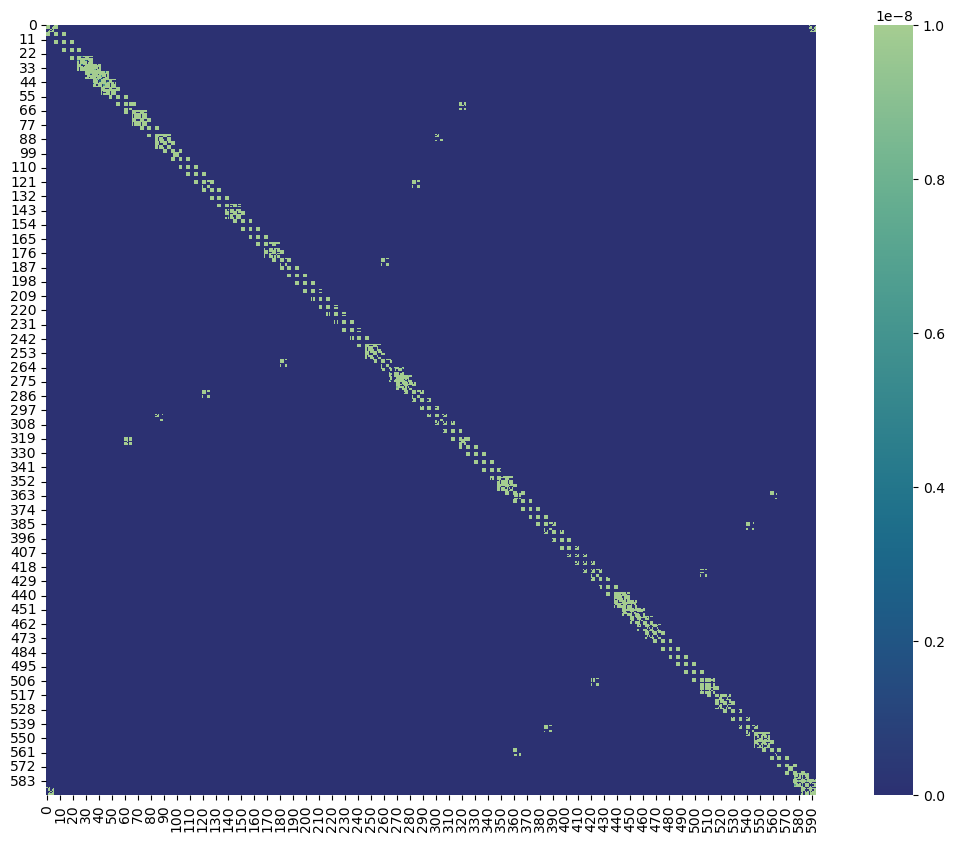

In [129]:
sns.heatmap(np.abs(data), square=True, vmax=0.00000001, cmap="crest_r")
np.sum(np.sum(np.abs(data), axis=0) == 0)/data.shape[0]*100, np.sum(np.sum(np.abs(data), axis=0) == 0)

## A, B, error, omega analysis

In [130]:
path = Path(r"C:\Users\chris\Documents\Work\Polymetrix\Rust\CruxTest\pose_graph\examples\output\data.json")
with open(path, "r") as inp:
    jacobian_data = json.load(inp)


As, Bs, errors, omegas, Zij, Xi, Xj = zip(*jacobian_data)

length = len(As)

As = np.array(As, dtype=float).reshape((length,6,6))
Bs = np.array(Bs, dtype=float).reshape((length,6,6))
errors = np.array(errors, dtype=float).reshape((length,6,1))
omegas = np.array(omegas, dtype=float).reshape((length,6,6))
Zij = np.array(Zij, dtype=float).reshape((length,4,4))
Xi = np.array(Xi, dtype=float).reshape((length,4,4))
Xj = np.array(Xj, dtype=float).reshape((length,4,4))

<Axes: >

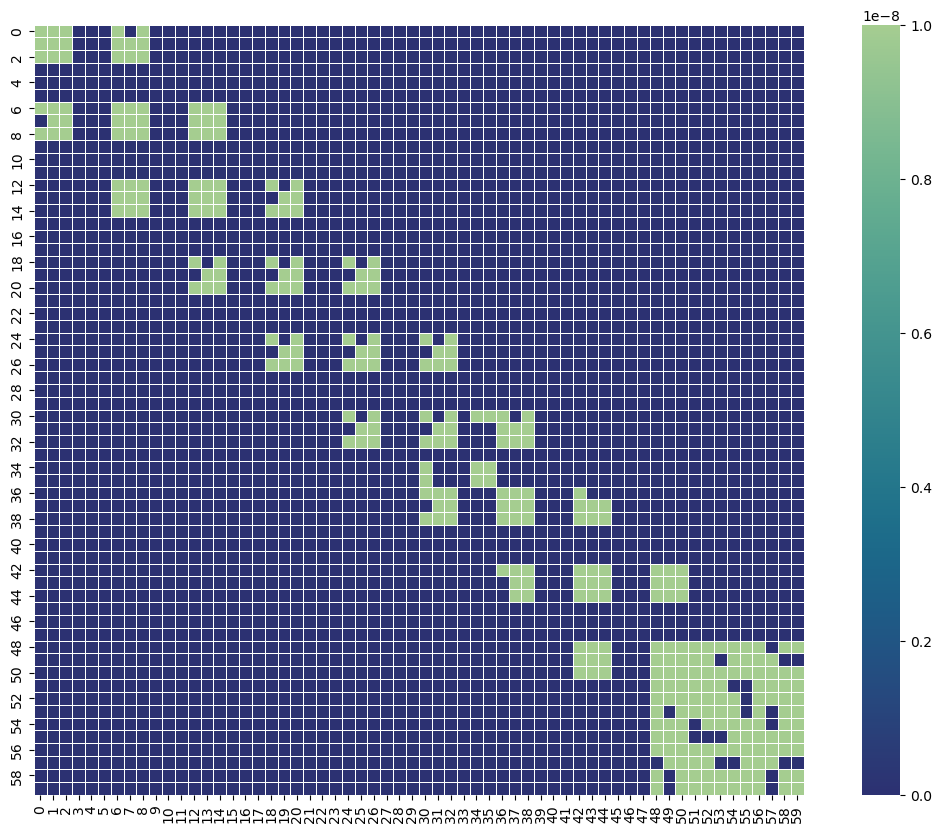

In [131]:
sns.heatmap(np.abs(data[390:450,390:450]), square=True, vmax=0.00000001, linewidth=.5, cmap="crest_r")

In [132]:
translation, rotation = 0,0

for i in range(0, data.shape[0], 6):
    if np.sum(np.abs(data[i:i+3, i:i+3])) == 0:
        translation += 1
    if np.sum(np.abs(data[i+3:i+6, i+3:i+6])) == 0:
        rotation += 1

translation, rotation

(0, 49)

<Axes: >

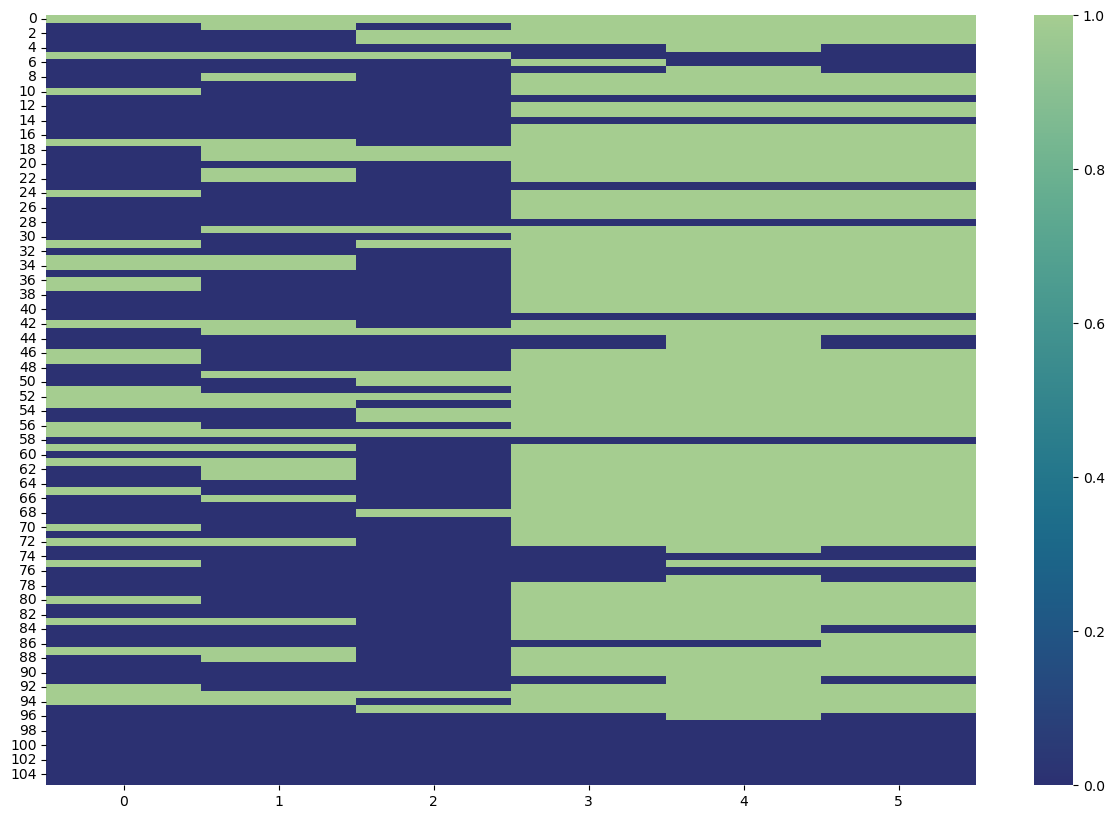

In [133]:
sns.heatmap(errors.squeeze() == 0, cmap="crest_r")

In [134]:
path = r"C:\Users\chris\Documents\Work\Polymetrix\Rust\CruxTest\pose_graph\examples\output\b.json"

with open(path, "r") as inp:
    b_data = json.load(inp)
    print(b_data)
    print(b_data[1], b_data[2])
    b_data = np.array(data[0], dtype=float)

b_data.shape

[[20.759512, 8.10786, 3.214528, 16.292625, -122.175224, 0.8504597, -5.806411e-09, 0.0, -2.3293406e-08, 0.0, 0.0, 0.0, -9.6875986e-08, 3.7296556e-07, -1.9239419e-08, 0.0, 0.0, 0.0, 1.1387655e-09, 4.1185615e-09, -2.981556e-09, 0.0, 0.0, 0.0, 9.555852e-08, 3.948678e-07, 5.4210014e-10, 1.6653343e-06, 3.5236565e-09, -1.3954019e-07, 8.876881e-09, 7.541682e-07, -4.336803e-09, 5.1169764e-08, -1.4680083e-06, -4.233084e-08, -1.1926204e-08, -2.739233e-16, 2.0383001e-07, -1.577723e-06, -7.4722647e-07, 7.734395e-07, -1.734727e-08, -2.7755575e-06, -5.648802e-08, 5.551102e-06, 6.67429e-07, 3.8889982e-07, -5.6649384e-07, -2.8692161e-06, -2.5139948e-07, 5.2006553e-06, 0.0, -1.7385042e-07, 2.9360405e-07, 3.4217421e-06, -2.3131436e-07, 0.0, 0.0, 0.0, 6.279456, 13.849193, 8.039154, 0.0, 31.088833, -78.576996, -9.107296e-08, 3.798932e-07, 1.03597586e-07, -8.118504e-06, 1.5178828e-06, 2.226951e-06, 2.0407465e-07, 2.0991297e-07, 2.0241836e-07, -6.657845e-06, 1.2221068e-06, 1.9438578e-06, 2.596542e-08, -1.146

(594,)

<Axes: >

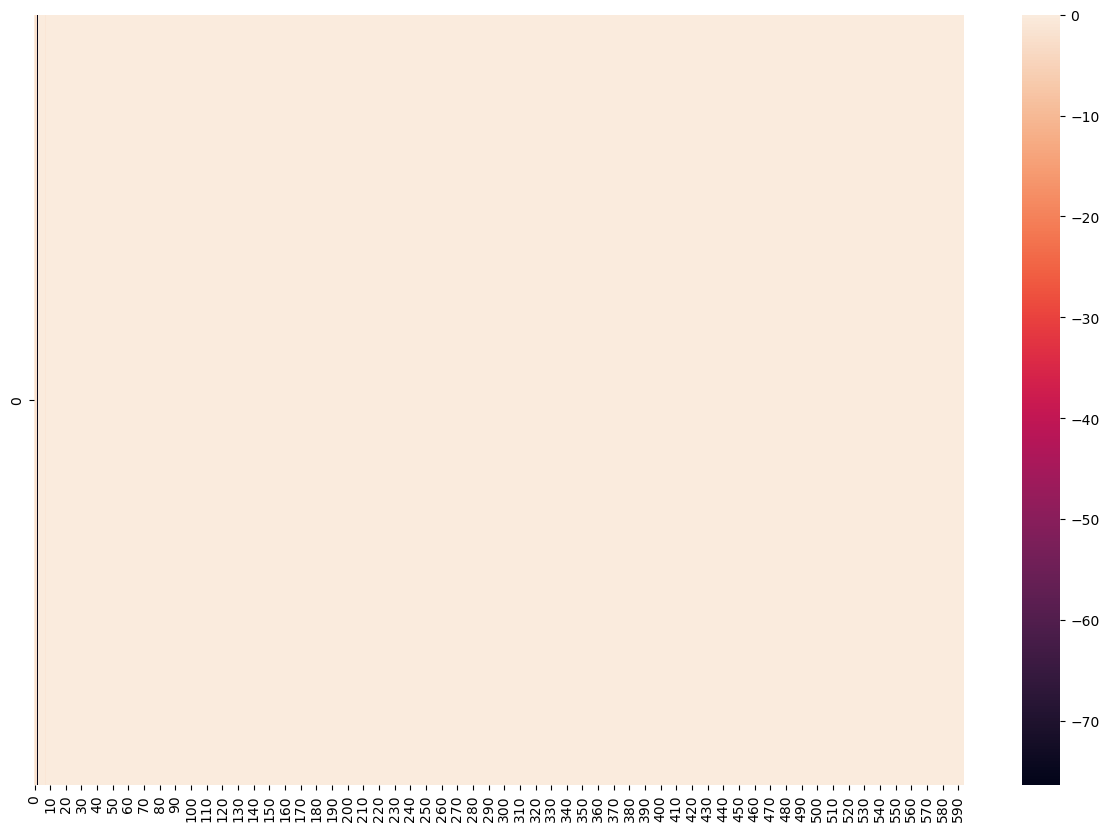

In [135]:
sns.heatmap(b_data[None], vmax=0.00001)